In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

## Load and clean data

In [2]:
data = pd.read_csv('data/EasyVisa.csv') 

In [3]:
# cleaning 
data.drop('case_id', axis=1, inplace=True)
data["no_of_employees"] = abs(data["no_of_employees"]) 

In [4]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(
    "case_status", axis=1
)  
y = data["case_status"]

X = pd.get_dummies(X)  

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, train_size=0.7, stratify=y
)

In [5]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 28)
Shape of test set :  (7644, 28)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Models

In [6]:
from scripts.models import ModelData

In [7]:
model_data = ModelData(X_train, X_test, y_train, y_test)

In [8]:
model_data.results_dfs

[]

### Vanilla Models

==========DecisionTreeClassifier==========


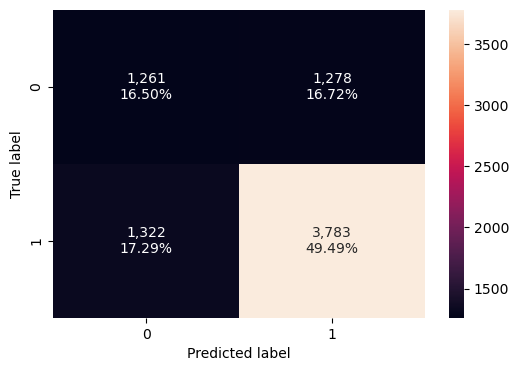

==========RandomForestClassifier==========


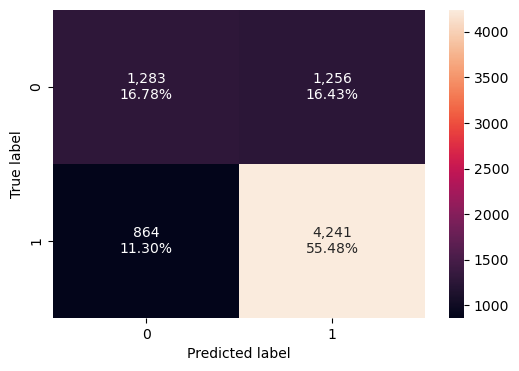

==========AdaBoostClassifier==========


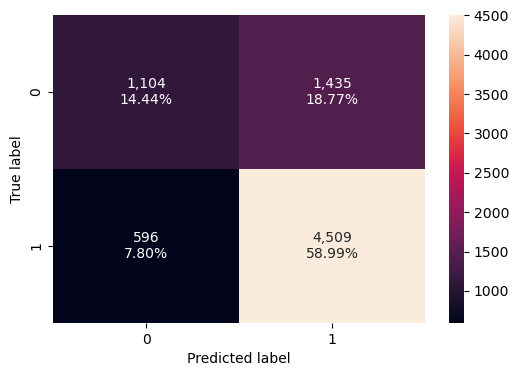

==========GradientBoostingClassifier==========


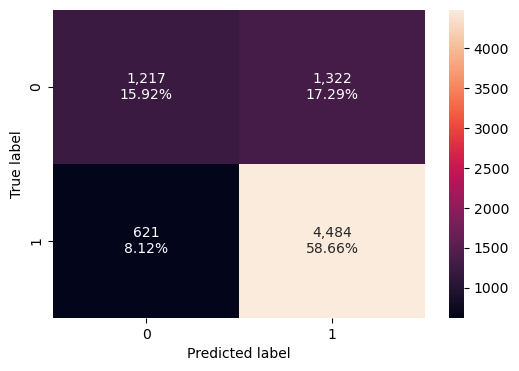

==========XGBClassifier==========


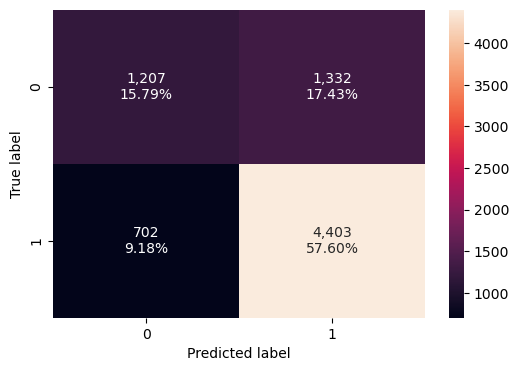

In [9]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

result_data = model_data.model_evaluation(models, 'vanilla')

In [10]:
result_data

,Model,Type,Accuracy,Recall,Precision,F1
0,DecisionTreeClassifier,vanilla,0.659864,0.741038,0.747481,0.744246
1,RandomForestClassifier,vanilla,0.722658,0.830754,0.771512,0.800038
2,AdaBoostClassifier,vanilla,0.734301,0.883252,0.758580,0.816182
3,GradientBoostingClassifier,vanilla,0.745814,0.878355,0.772305,0.821923
4,XGBClassifier,vanilla,0.733909,0.862488,0.767742,0.812362


### Decision Tree

In [11]:
dtree_model = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

dtree_estimator = model_data.tune_model_hyperparameter(dtree_model, parameters)

In [12]:
dtree_estimator

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [13]:
model_data.tuned_models

[DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                        min_impurity_decrease=0.0001, min_samples_leaf=3,
                        random_state=1)]

### Bagging classifier

In [14]:
# bagging_estimator_tuned = BaggingClassifier(random_state=1)

# # Grid of parameters to choose from
# parameters = {
#     "max_samples": [0.7, 0.9],
#     "max_features": [0.7, 0.9],
#     "n_estimators": np.arange(90, 111, 10),
# }

# model_data.tune_model_hyperparameter(bagging_estimator_tuned, parameters)


In [15]:
# model_data.tuned_models

### Random Forest

In [16]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5)
}

model_data.tune_model_hyperparameter(rf_tuned, parameters)

/home/alli/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/alli/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/alli/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/alli/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/alli/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=25, oob_score=True, random_state=1)

In [17]:
model_data.tuned_models

[DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                        min_impurity_decrease=0.0001, min_samples_leaf=3,
                        random_state=1),
 RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                        n_estimators=25, oob_score=True, random_state=1)]

### Ada Boost

In [18]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

model_data.tune_model_hyperparameter(abc_tuned, parameters)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [19]:
model_data.tuned_models

[DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                        min_impurity_decrease=0.0001, min_samples_leaf=3,
                        random_state=1),
 RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                        n_estimators=25, oob_score=True, random_state=1),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                          max_depth=1,
                                                          random_state=1),
                    learning_rate=0.1, n_estimators=100, random_state=1)]

### GradientBoostingClassifier

In [20]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

model_data.tune_model_hyperparameter(gbc_tuned, parameters)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

In [21]:
model_data.tuned_models

[DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                        min_impurity_decrease=0.0001, min_samples_leaf=3,
                        random_state=1),
 RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                        n_estimators=25, oob_score=True, random_state=1),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                          max_depth=1,
                                                          random_state=1),
                    learning_rate=0.1, n_estimators=100, random_state=1),
 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                            max_features=0.9, n_estimators=200, random_state=1,
                            subsample=0.9)]

### Xgboost

In [22]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

model_data.tune_model_hyperparameter(xgb_tuned, parameters)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [23]:
model_data.tuned_models

[DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                        min_impurity_decrease=0.0001, min_samples_leaf=3,
                        random_state=1),
 RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                        n_estimators=25, oob_score=True, random_state=1),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                          max_depth=1,
                                                          random_state=1),
                    learning_rate=0.1, n_estimators=100, random_state=1),
 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                            max_features=0.9, n_estimators=200, random_state=1,
                            subsample=0.9),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.9,
          

### Tuned Models

==========DecisionTreeClassifier==========


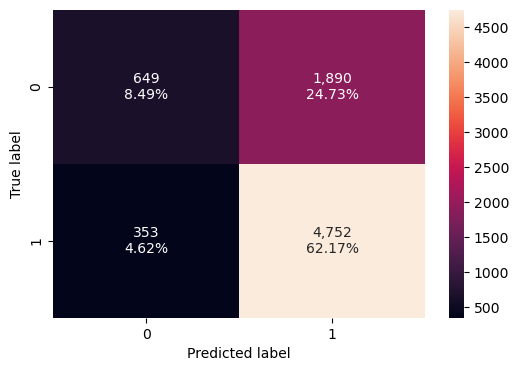

==========RandomForestClassifier==========


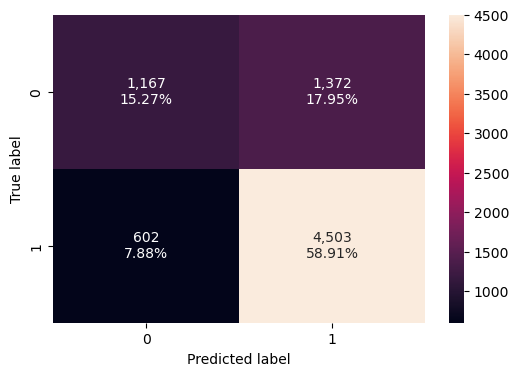

==========AdaBoostClassifier==========


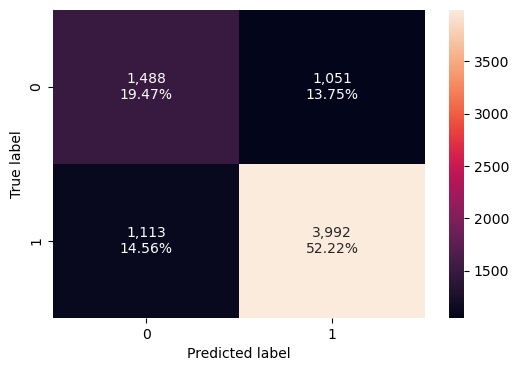

==========GradientBoostingClassifier==========


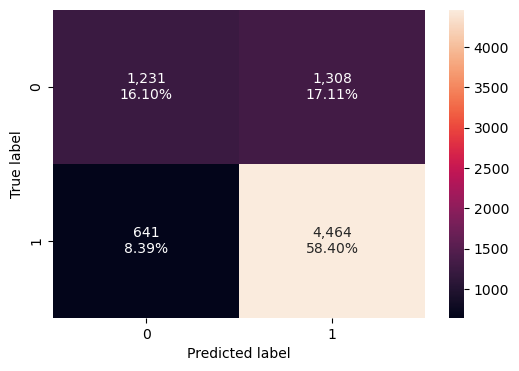

==========XGBClassifier==========


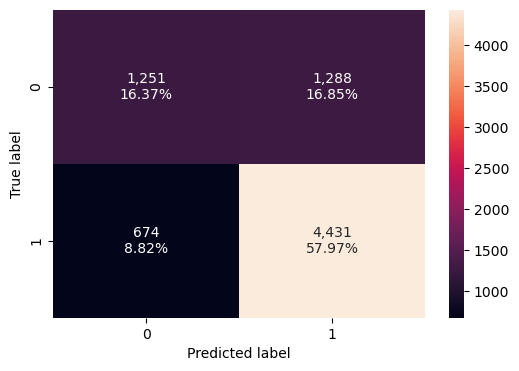

In [24]:
result_df = model_data.model_evaluation(model_data.tuned_models, 'tuned')

In [25]:
result_df

,Model,Type,Accuracy,Recall,Precision,F1
0,DecisionTreeClassifier,vanilla,0.659864,0.741038,0.747481,0.744246
1,RandomForestClassifier,vanilla,0.722658,0.830754,0.771512,0.800038
2,AdaBoostClassifier,vanilla,0.734301,0.883252,0.758580,0.816182
3,GradientBoostingClassifier,vanilla,0.745814,0.878355,0.772305,0.821923
4,XGBClassifier,vanilla,0.733909,0.862488,0.767742,0.812362
5,DecisionTreeClassifier,tuned,0.706567,0.930852,0.715447,0.809058
6,RandomForestClassifier,tuned,0.741758,0.882076,0.766468,0.820219
7,AdaBoostClassifier,tuned,0.716902,0.781978,0.791592,0.786756
8,GradientBoostingClassifier,tuned,0.745029,0.874437,0.773389,0.820815
9,XGBClassifier,tuned,0.743328,0.867973,0.774786,0.818736


In [26]:
# result_df.iloc[0:11, :]

In [28]:
# result_df.index[11:]

In [27]:
# result_df.drop(result_df.index[11:], axis=0, inplace=True)

In [26]:
# result_df = result_df.drop(result_df.index[6], axis=0).reset_index(drop=True)
# result_df 

In [27]:
result_df['Model'] = result_df['Model'].str.replace('Classifier', '')
result_df

,Model,Type,Accuracy,Recall,Precision,F1
0,DecisionTree,vanilla,0.659864,0.741038,0.747481,0.744246
1,RandomForest,vanilla,0.722658,0.830754,0.771512,0.800038
2,AdaBoost,vanilla,0.734301,0.883252,0.758580,0.816182
3,GradientBoosting,vanilla,0.745814,0.878355,0.772305,0.821923
4,XGB,vanilla,0.733909,0.862488,0.767742,0.812362
5,DecisionTree,tuned,0.706567,0.930852,0.715447,0.809058
6,RandomForest,tuned,0.741758,0.882076,0.766468,0.820219
7,AdaBoost,tuned,0.716902,0.781978,0.791592,0.786756
8,GradientBoosting,tuned,0.745029,0.874437,0.773389,0.820815
9,XGB,tuned,0.743328,0.867973,0.774786,0.818736


## Plot results

In [28]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [79]:
result_df['Type'].unique()

array(['vanilla', 'tuned'], dtype=object)

In [33]:
import plotly.graph_objects as go
import plotly.express as px

metrics = ["Accuracy", "Recall", "F1", "Precision"]

# Create a subplot bar chart
fig = make_subplots(rows=2, cols=2, subplot_titles=metrics)

# Set color scale for Vanilla and Tuned models
color_scale = {"vanilla": "rgb(253, 178, 107)", "tuned": "rgb(117, 112, 179)"}


# Add bars for each type of data
for i, metric in enumerate(metrics):
    df = result_df.copy()
    # Create a trace for each model type
    for type in df["Type"].unique():
        trace = go.Bar(
            x=df[df["Type"] == type]["Model"],
            y=df[df["Type"] == type][metric],
            name=type,
            legendgroup="metric",
            showlegend=i == 0,
            marker=dict(color=df[df["Type"] == type]["Type"].map(color_scale)),
        )
        fig.add_trace(trace, row=(i // 2) + 1, col=(i % 2) + 1)

    # Hide subplot x-axis titles
    fig.update_xaxes(title_text="", row=(i // 2) + 1, col=(i % 2) + 1)

# Update layout with main title and axis labels
fig.update_layout(
    title="Metrics Comparison for Vanilla and Tuned Models",
    legend=dict(title="Type"),
    # orientation="h", yanchor="bottom", y=-0.2, xanchor="right", x=1
    xaxis3=dict(title="Model"),
    xaxis4=dict(title="Model"),
    yaxis=dict(title="Accuracy"),
    yaxis2=dict(title="Recall"),
    yaxis3=dict(title="F1"),
    yaxis4=dict(title="Precision"),
    height=700,
)

# Show the plot
fig.show()


**Vanilla GradientBoost**

In [70]:
def plot_result(metric: str):
    fig = px.bar(
        result_df,
        x="Type",
        y=metric,
        facet_col="Model",
        color="Type",
    )

    # hide subplot y-axis titles and x-axis titles
    for axis in fig.layout:
        # if type(fig.layout[axis]) == go.layout.YAxis:
        #     fig.layout[axis].title.text = ''
        if type(fig.layout[axis]) == go.layout.XAxis:
            fig.layout[axis].title.text = ''
    fig.update_layout(title=f"Comparison for Vanilla and Tuned Model: {metric}")
    
    fig.show()


In [71]:
plot_result("Accuracy")

In [62]:
plot_result("Recall")

In [63]:
plot_result("F1")

In [64]:
plot_result("Precision")